# CAR PRICE PREDICTION

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### LOAD DATA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [4]:
Data_path = "/content/drive/MyDrive/OASIS SALES/Task_3_CarPricePred/archive_car/car data.csv"
df = pd.read_csv(Data_path)

### DATA EXPLORATION

In [5]:

print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## DISTRIBUTION PLOTS FOR THE NUMERICAL FEATURES

Distribution plot for :  YEAR


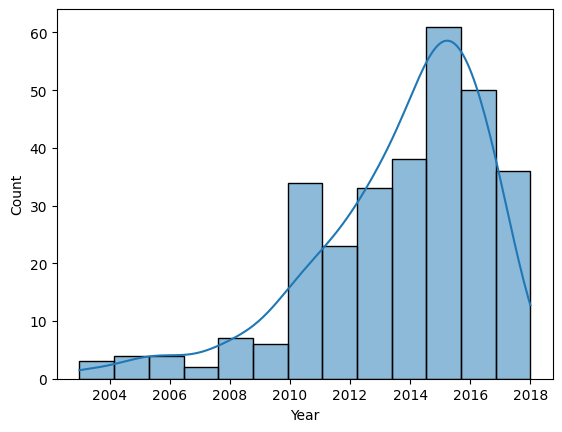

Distribution plot for:  OWNER


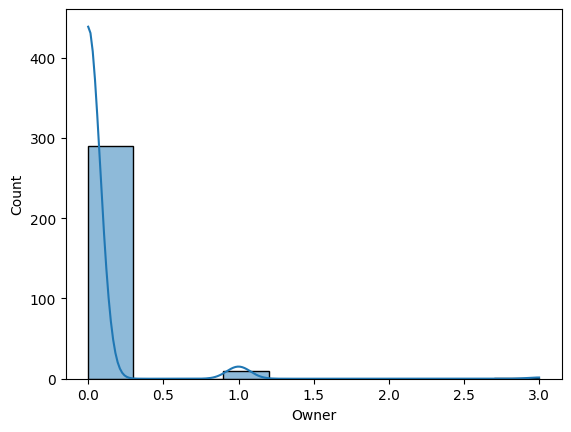

Distribution plot for:  DRIVEN_KMS


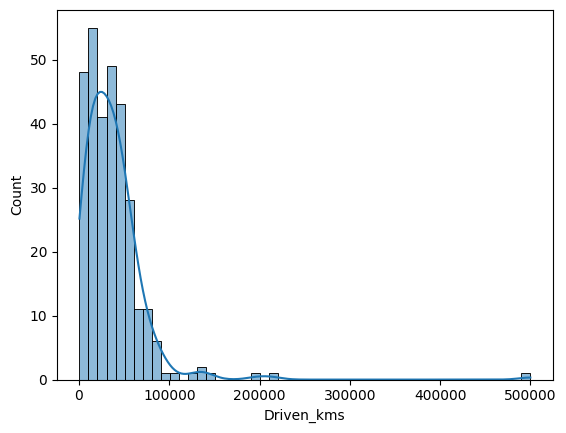

In [7]:
#Histogram showing the price distribution of the dataset
num_features = ['Year','Owner','Driven_kms']
for feature in num_features:
    if feature == 'Year':
        sns.histplot(df[feature],kde = True)
        print("Distribution plot for : ", feature.upper())
        plt.show()
    elif feature == 'Owner':
        sns.histplot(df[feature],kde = True)
        print("Distribution plot for: ",feature.upper())
        plt.show()
    elif feature == 'Driven_kms':
        sns.histplot(df[feature],kde = True)
        print("Distribution plot for: ",feature.upper())
        plt.show()


## COUNT PLOTS FOR THE CATEGORICAL FEATURES

Distribution plot for :  TRANSMISSION


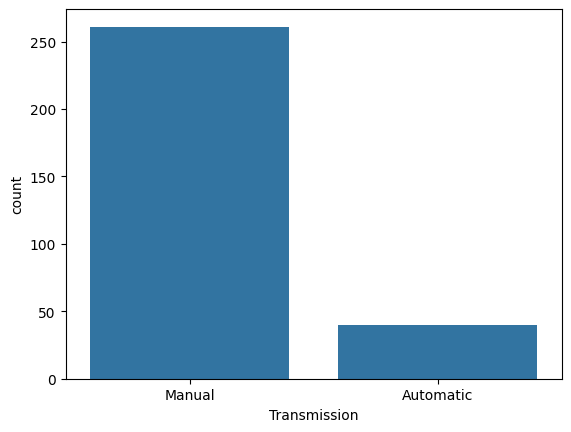

Distribution plot for:  SELLING_TYPE


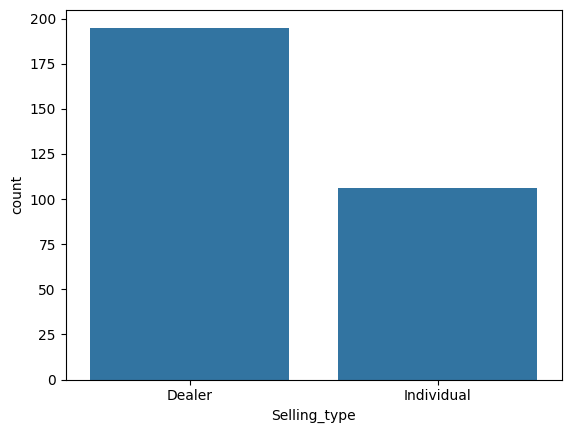

Distribution plot for:  FUEL_TYPE


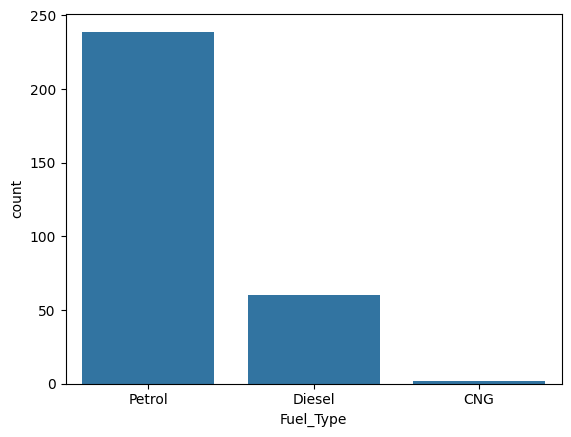

Distribution plot for(only a sample):  CAR_NAME


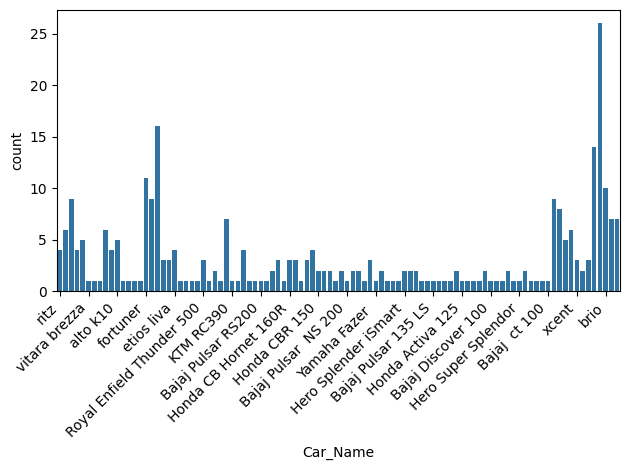

In [13]:
#Histogram showing the price distribution of the dataset
num_features = ['Transmission','Selling_type','Fuel_Type','Car_Name']
for feature in num_features:
    if feature == 'Transmission':
        sns.countplot(x =feature,data =df)
        print("Distribution plot for : ", feature.upper())
        plt.show()
    elif feature == 'Selling_type':
        sns.countplot(x =feature,data =df)
        print("Distribution plot for: ",feature.upper())
        plt.show()
    elif feature == 'Fuel_Type':
        sns.countplot(x =feature,data =df)
        print("Distribution plot for: ",feature.upper())
        plt.show()
    elif feature == 'Car_Name':
        sns.countplot(x =feature,data =df)
        plt.xticks(rotation = 45, ha = 'right',fontsize =10)
        plt.xticks(range(0,len(df[feature].unique()),5),df[feature].unique()[::5])
        plt.tight_layout()
        print("Distribution plot for(only a sample): ",feature.upper())
        plt.show()

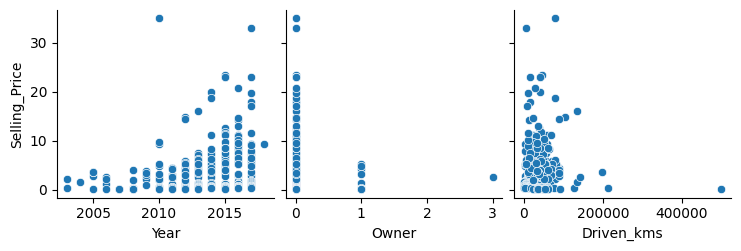

In [9]:
sns.pairplot(df, x_vars=["Year","Owner", "Driven_kms"], y_vars= ["Selling_Price"],kind = "scatter")
plt.show()

##### The scatter plots show positive correlation between the Year and the Selling_Price.For features Owner and Driven_kms we can see that the lower values are predominant and correlate to high values of the selling price more than the higher values.

###PREPROCESSING

In [10]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [11]:
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Selling_type', 2), ('Transmission', 2), ('Fuel_Type', 3), ('Car_Name', 98)]

In [12]:
#Removing columns with missing data
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

if cols_with_missing:
    print(cols_with_missing)
else:
    print("No columns with msiing values,therefore no need for imputation")

No columns with msiing values,therefore no need for imputation


### LOAD FEATURES

In [13]:
Features = ['Car_Name','Year','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']
X = df[Features]
y = df.Selling_Price

In [14]:
# spliting data into training dtat and testing data
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size= 0.6,random_state = 42 )
#Sec split to create test set
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,test_size = 0.5,random_state = 42)

In [15]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(120, 7)
(90, 7)
(120,)
(90,)
(91, 7)
(91,)


## FEATURE ENGINEERING

In [16]:
# One hot encoding to transform to the right format for ml modeling(creates numerical representaion of categories or classes of feature)
from sklearn.preprocessing import OneHotEncoder
myEncoder = OneHotEncoder(handle_unknown = 'ignore',sparse = False)

OHE_col_train = pd.DataFrame(myEncoder.fit_transform(X_train[object_cols]))
OHE_col_val = pd.DataFrame(myEncoder.transform(X_val[object_cols]))
OHE_col_test = pd.DataFrame(myEncoder.transform(X_test[object_cols]))

# Put back
OHE_col_train.index = X_train.index
OHE_col_val.index = X_val.index
OHE_col_test.index = X_test.index



#Remove categoriacl columns
num_X_train = X_train.drop(object_cols,axis =1)
num_X_val  = X_val.drop(object_cols, axis =1)
num_X_test  = X_test.drop(object_cols, axis =1)

#concatenate
OHE_X_train = pd.concat([num_X_train,OHE_col_train], axis =1)
OHE_X_val = pd.concat([num_X_val, OHE_col_val], axis=1)
OHE_X_test = pd.concat([num_X_test,OHE_col_test], axis =1)

#Make all string type
OHE_X_train.columns = OHE_X_train.columns.astype(str)
OHE_X_val.columns = OHE_X_val.columns.astype(str)
OHE_X_test.columns = OHE_X_test.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### MODEL TRAINING AND EVALUATION

#####DECISION TREE REGRESSOR

In [17]:
Model = DecisionTreeRegressor(random_state =42)
Model.fit(OHE_X_train,y_train)
val_pred = Model.predict(OHE_X_val)
test_pred = Model.predict(OHE_X_test)

In [18]:
OHE_X_val.shape

(90, 66)

In [19]:
print('Val test Price predictions are: ',val_pred)
print('Test Price predictions are: ',test_pred)

Val test Price predictions are:  [ 0.45  3.    2.85  2.75  3.    6.7   2.55  4.    0.45  1.75  0.45  2.5
  3.    4.    4.9   8.4   0.2   0.12  4.5   3.25  0.6   0.4   7.75  0.45
  0.45  0.38  0.45  2.55 18.    6.85  3.    0.2   0.38  3.    3.9   5.3
  5.85 11.75  0.45  6.4   0.45 18.    4.1   0.5  18.75  0.48  0.45  6.4
  0.5   5.95  5.8   6.4   2.75  0.5   6.85  3.    0.12  8.55  3.    4.8
  3.    4.1   4.8   0.5  11.75 11.75  3.95  2.85  4.    0.12  0.45  6.7
 18.75  3.95  0.25 11.25  4.1   2.75  0.5   3.    2.85  9.15  3.9   0.45
  3.    5.8   5.95  7.05  4.8   4.  ]
Test Price predictions are:  [ 0.45  3.9   1.05  0.38  0.5   3.35  0.45  7.75  0.45 11.75 11.75  5.95
  0.5   1.    0.45  0.45  0.5   4.    4.1   5.25  4.    4.1   9.1   0.45
  5.95  5.9   0.45  0.75  0.75  2.55  0.45  9.15  0.5   0.45 18.75  1.05
  2.25  1.05 18.75  7.2   4.1   2.25  4.9  11.75  2.75 11.75  1.    4.8
  0.4   2.9  18.75  7.2   2.25  4.1   7.2   0.72  2.25 11.25  5.3   7.2
  6.7   4.4   0.51  0.5   7.05 

In [20]:
from sklearn.metrics import mean_absolute_error
Eval_error = mean_absolute_error(y_val,val_pred)
Test_evalError = mean_absolute_error(y_test,test_pred)
print(f"Mean Absolute Error for Validation pred error : {Eval_error}")
print(f"Mean Absolute Error for Test pred  is : {Test_evalError}")

Validation pred error is : 1.179
Test pred error is : 1.5697802197802198
